In [1]:
import time
from datetime import datetime
import vectorbt as vbt
from tqdm import tqdm

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('USDJPY_1h.csv')
data.tail()

,timestamp,open,high,low,close,adj close,volumn
4984,2022-08-30 13:00:00+01:00,138.197998,138.501007,138.160004,138.492996,138.492996,0
4985,2022-08-30 14:00:00+01:00,138.490997,138.561005,138.139999,138.386002,138.386002,0
4986,2022-08-30 15:00:00+01:00,138.382996,139.080002,138.360001,138.886002,138.886002,0
4987,2022-08-30 16:00:00+01:00,138.884995,138.955994,138.580002,138.727997,138.727997,0
4988,2022-08-30 17:00:00+01:00,138.725998,138.772995,138.619995,138.690994,138.690994,0


In [3]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_localize(None)
df.set_index('timestamp', inplace = True)
df

,open,high,low,close,adj close,volumn
timestamp,,,,,,
2021-11-04 17:00:00,113.750000,113.750999,113.620003,113.680000,113.680000,0
2021-11-04 18:00:00,113.680000,113.740997,113.639999,113.738998,113.738998,0
2021-11-04 19:00:00,113.737000,113.787003,113.669998,113.702003,113.702003,0
2021-11-04 20:00:00,113.700996,113.779999,113.680000,113.746002,113.746002,0
2021-11-04 21:00:00,113.733002,113.769997,113.692001,113.740997,113.740997,0
...,...,...,...,...,...,...
2022-08-30 12:00:00,138.197998,138.501007,138.160004,138.492996,138.492996,0
2022-08-30 13:00:00,138.490997,138.561005,138.139999,138.386002,138.386002,0
2022-08-30 14:00:00,138.382996,139.080002,138.360001,138.886002,138.886002,0


In [4]:
df.ta.rsi(14, append=True)
df

,open,high,low,close,adj close,volumn,RSI_14
timestamp,,,,,,,
2021-11-04 17:00:00,113.750000,113.750999,113.620003,113.680000,113.680000,0,NaN
2021-11-04 18:00:00,113.680000,113.740997,113.639999,113.738998,113.738998,0,NaN
2021-11-04 19:00:00,113.737000,113.787003,113.669998,113.702003,113.702003,0,NaN
2021-11-04 20:00:00,113.700996,113.779999,113.680000,113.746002,113.746002,0,NaN
2021-11-04 21:00:00,113.733002,113.769997,113.692001,113.740997,113.740997,0,NaN
...,...,...,...,...,...,...,...
2022-08-30 12:00:00,138.197998,138.501007,138.160004,138.492996,138.492996,0,53.649627
2022-08-30 13:00:00,138.490997,138.561005,138.139999,138.386002,138.386002,0,48.998359
2022-08-30 14:00:00,138.382996,139.080002,138.360001,138.886002,138.886002,0,64.491257


In [14]:
def rsi_plot(df, start, end, rsi_length, peak_idx, peak_points):
    df_plot = df.iloc[start: end]
    rsi = df_plot['RSI_'+str(rsi_length)]

    overbought = np.empty(df_plot.shape[0])
    overbought.fill(70)
    oversold = np.empty(df_plot.shape[0])
    oversold.fill(30)

    peak = np.empty(df_plot.shape[0])
    peak.fill(0)
    peak_start, peak_end = peak_points[0], peak_points[1] # rsi.iloc[peak_idx[0]], rsi.iloc[peak_idx[1]]
    len_peaks = peak_idx[1] - peak_idx[0]# df.loc[peak_start:peak_end].shape[0]
    peak[peak_idx[0]:peak_idx[1]] = np.linspace(peak_start, peak_end, num=len_peaks)
    # peak = np.roll(peak, 3)
    # peak = np.flip(peak)

    rsi_plot = mpf.make_addplot(rsi, panel=1, color='blue', width=1, ylabel='rsi')
    overbought_plot = mpf.make_addplot(overbought, panel=1, color='orange', width=0.8, secondary_y=False)
    oversold_plot = mpf.make_addplot(oversold, panel=1, color='orange', width=0.8, secondary_y=False)
    peak_plot = mpf.make_addplot(peak, panel=1, color='green', width=0.8, secondary_y=False) # 

    result_plots = [rsi_plot, overbought_plot, oversold_plot, peak_plot]

    return result_plots

In [6]:
a = np.linspace(1,10 ,num=10)
s = len(a) - 5
a[s:-3]

array([6., 7.])

In [7]:
def find_peak(price, i, order, K=6):
    # max_idx, min_idx ใช้หาจุดสูงสุด/ต่ำสุดสัมพัทธ์ทั้งหมดได้ผลออกมาเป็น list , order คือค่า sampling
    max_idx = list(argrelextrema(price.values[:i], np.greater, order=order)[0])
    min_idx = list(argrelextrema(price.values[:i], np.less, order=order)[0])

    idx = max_idx + min_idx + [len(price.values[:i]) - 1] # รวม index ของค่าจุดสูงสุด/ต่ำสุดกับราคาล่าสุดเป็น list
    idx.sort()  # เรียงลำดับเลข index จากน้อยไปมาก
    current_idx = idx[-K:] # เลือกจุดสูงสุด/ต่ำสุด K จุดล่าสุด
    
    start = min(current_idx) # index เริ่มต้นของค่าจุดสูงสุด/ต่ำสุด
    end = max(current_idx)  # index สุดท้ายของค่าจุดสูงสุด/ต่ำสุด
    
    current_pat = price.values[current_idx] # list ของค่าจุดสูงสุด/ต่ำสุด
    
    return current_pat, current_idx, start, end

In [8]:
def find_last_peak_range(price, start, end, order, side='high'):
    idx = []
    price = price.values[start:end]
    if side == 'high':
        max_idx = list(argrelextrema(price, np.greater, order=order)[0])
        idx = max_idx # + [len(price.values[start:end]) - 1]

    elif side == 'low':
        min_idx = list(argrelextrema(price, np.less, order=order)[0])
        idx = min_idx # + [len(price.values[start:end]) - 1] 

    idx.sort() 
    current_idx = idx[-2:]
    if len(current_idx) <= 1 : return [], [], 0, 0
    start = min(current_idx) # index เริ่มต้นของค่าจุดสูงสุด/ต่ำสุด
    end = max(current_idx)  # index สุดท้ายของค่าจุดสูงสุด/ต่ำสุด
    
    current_pat = price[current_idx] # list ของค่าจุดสูงสุด/ต่ำสุด

    return current_pat, current_idx, start, end

In [9]:
def find_last_peak(price, i, order, side='high'):
    idx = []
    price = price.values[:i]
    if side == 'high':
        max_idx = list(argrelextrema(price, np.greater, order=order)[0])
        idx = max_idx # + [len(price) - 1]

    elif side == 'low':
        min_idx = list(argrelextrema(price, np.less, order=order)[0])
        idx = min_idx # + [len(price) - 1] 

    idx.sort() 
    current_idx = idx[-2:]
    if len(current_idx) <= 1 : return [], [], 0, 0
    start = min(current_idx) # index เริ่มต้นของค่าจุดสูงสุด/ต่ำสุด
    end = max(current_idx)  # index สุดท้ายของค่าจุดสูงสุด/ต่ำสุด
    
    current_pat = price[current_idx] # list ของค่าจุดสูงสุด/ต่ำสุด
    
    return current_pat, current_idx, start, end

In [10]:
def find_trend(current_pat):
    if len(current_pat) < 4: return False
    # current มองเป็นจุดกลับตัวแต่ละจุดแล้วนำมาเข้าเงื่อนไขลักษณะของเทรนต่างๆ
    if current_pat[0] < current_pat[1] and current_pat[0] < current_pat[2] and current_pat[0] < current_pat[4] and \
        current_pat[1] > current_pat[2] and current_pat[1] < current_pat[3] and current_pat[2] < current_pat[3] and \
        current_pat[2] < current_pat[4] and current_pat[3] > current_pat[4]:
        
        return 'up'

    elif current_pat[0] > current_pat[1] and current_pat[0] > current_pat[2] and current_pat[0] > current_pat[4] and \
        current_pat[1] < current_pat[2] and current_pat[1] > current_pat[3] and current_pat[2] > current_pat[3] and \
        current_pat[2] > current_pat[4] and current_pat[3] < current_pat[4]:
        
        return 'down'

    elif current_pat[0] < current_pat[1] and current_pat[0] < current_pat[2] and current_pat[0] < current_pat[4] and \
        current_pat[1] > current_pat[2] and current_pat[1] < current_pat[3] and current_pat[2] < current_pat[3] and \
        current_pat[2] > current_pat[4] and current_pat[3] > current_pat[4]:
        
        return 'up end'

    elif current_pat[0] > current_pat[1] and current_pat[0] > current_pat[2] and current_pat[0] > current_pat[4] and \
        current_pat[1] < current_pat[2] and current_pat[1] > current_pat[3] and current_pat[2] > current_pat[3] and \
        current_pat[2] < current_pat[4] and current_pat[3] < current_pat[4]:
        
        return 'down end'

    else:
        return False

In [11]:
def find_divergence(bars_pat, rsi_pat, di_type='bullish'):
    
    if len(bars_pat) <= 1 or len(rsi_pat) <= 1:
        return False

    if ( bars_pat[0] < bars_pat[1] and rsi_pat[0] > rsi_pat[1] ) or ( bars_pat[0] > bars_pat[1] and rsi_pat[0] < rsi_pat[1] ) or \
        ( bars_pat[0] <= bars_pat[1] and rsi_pat[0] > rsi_pat[1] ) or ( bars_pat[0] >= bars_pat[1] and rsi_pat[0] < rsi_pat[1] ) or \
        ( bars_pat[0] < bars_pat[1] and rsi_pat[0] >= rsi_pat[1] ) or ( bars_pat[0] > bars_pat[1] and rsi_pat[0] <= rsi_pat[1] ):
        
        if di_type == 'bullish':
            return 'Bullish Divergence'
        elif di_type == 'bearish':
            return 'Bearish Divergence'
        else:
            return 'Divergence'
    else:
        return False

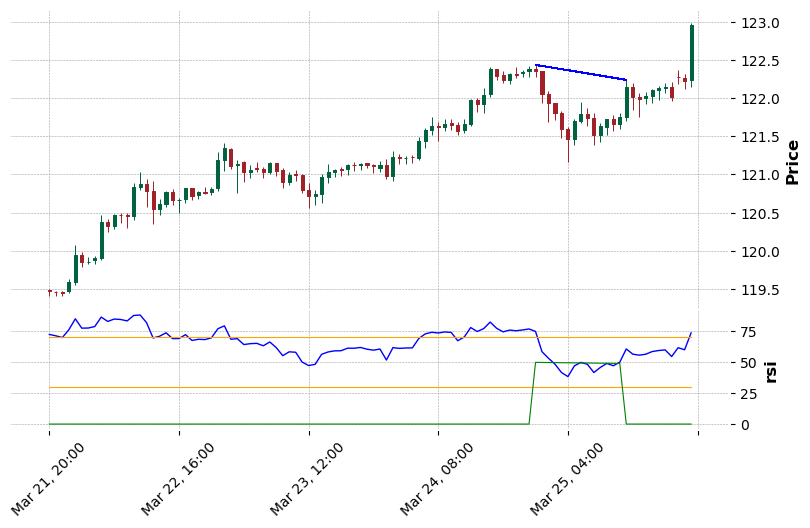

In [15]:
price_start, price_end = 2300, 2400
price = df.copy().iloc[price_start:price_end]
current_pat, current_idx, start, end = find_last_peak(price['high'], price_end, 6, 'high')
peak_lines = [(price.index[current_idx[i]], current_pat[i]) for i in range(len(current_pat))]

rsi_high_pat, rsi_high_idx, rsi_high_start, rsi_high_end = find_last_peak_range(price['RSI_14'], start, end, 1, 'high')
# rsi_peak_high_line = [(price.index[rsi_high_idx[i]], rsi_high_pat[i]) for i in range(len(rsi_high_pat))]

# print(price['RSI_14'].iloc[start: end])
# print(rsi_high_pat)

if len(peak_lines) > 1:
     mpf.plot(df.iloc[price_start:price_end], type='candle', style='charles',
          addplot=rsi_plot(df, price_start, price_end, 14, current_idx, rsi_high_pat),
          alines=dict(alines=peak_lines,colors=['blue'], linewidths=0.8),
          figsize=(10, 6))

Bullish Divergence


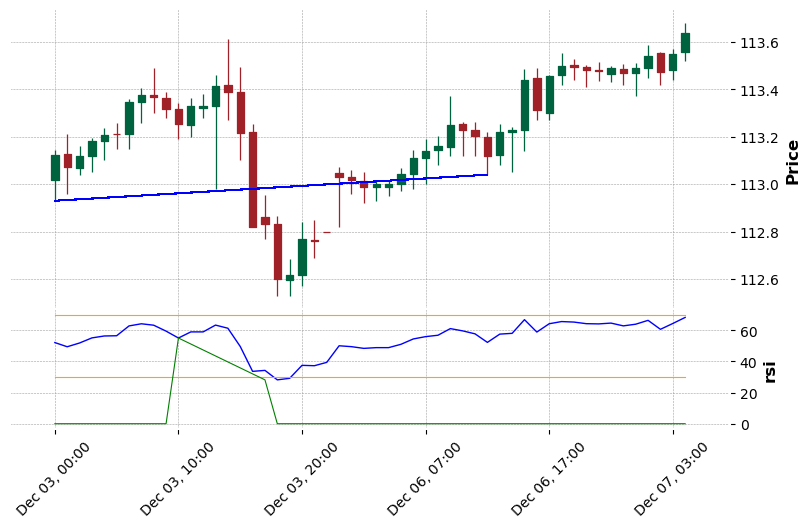

Bullish Divergence


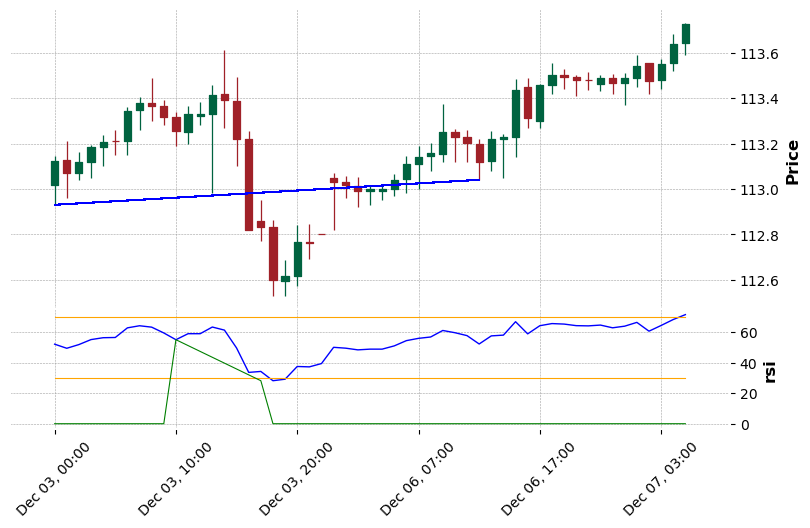

Bullish Divergence


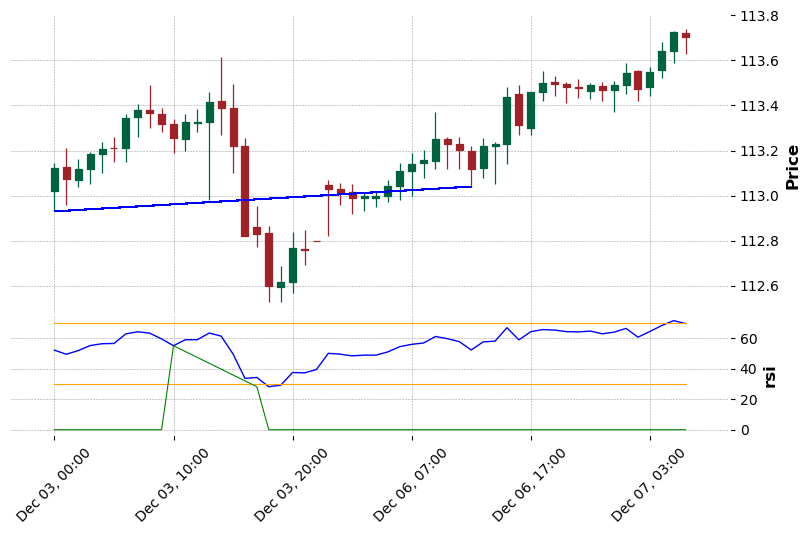

Bullish Divergence


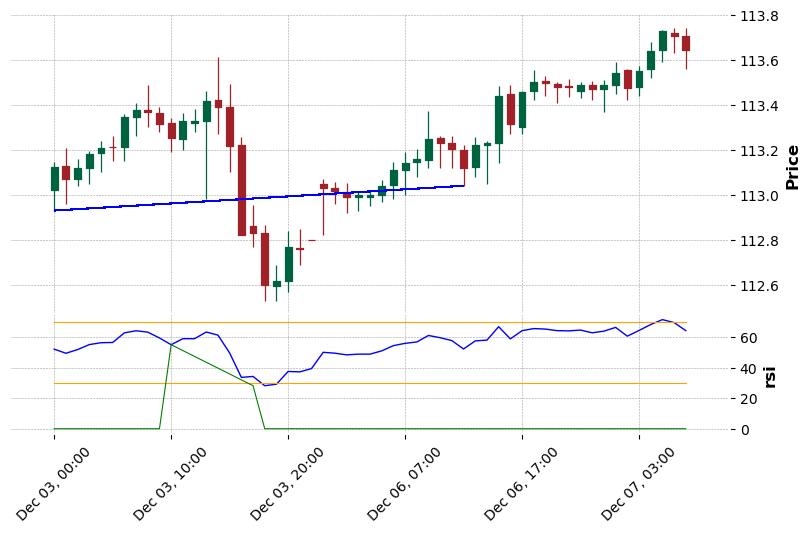

Bullish Divergence


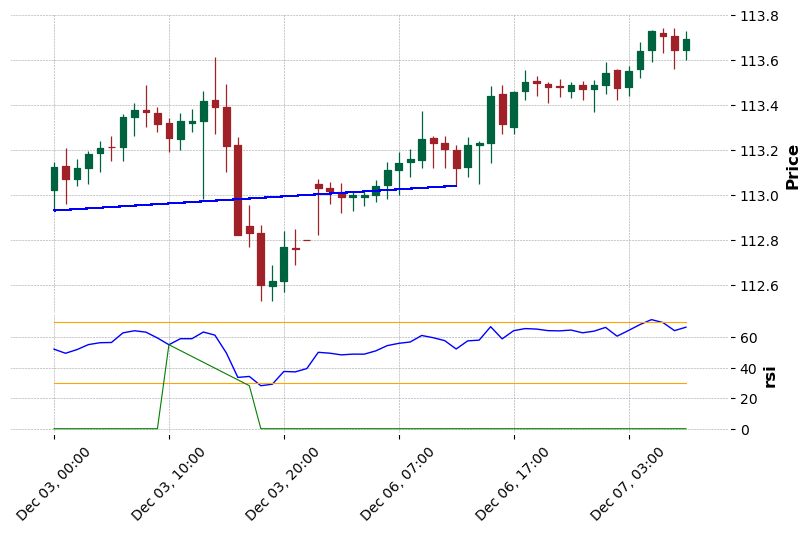

Bullish Divergence


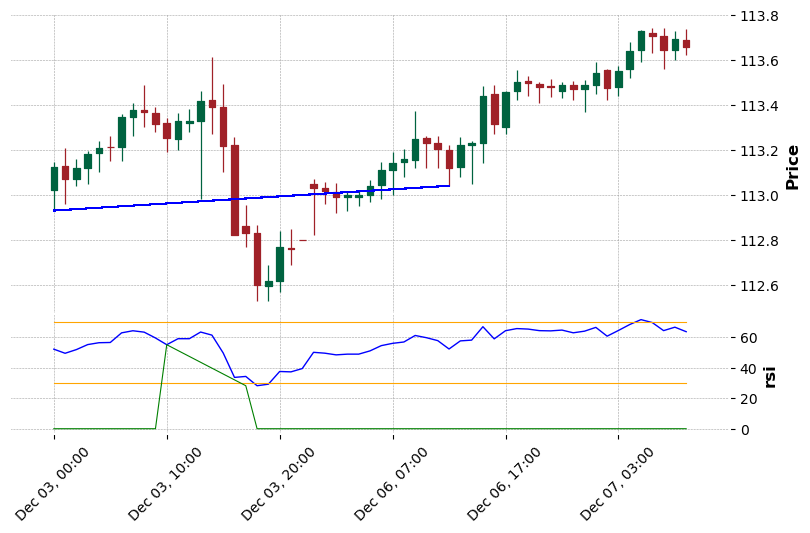

Bullish Divergence


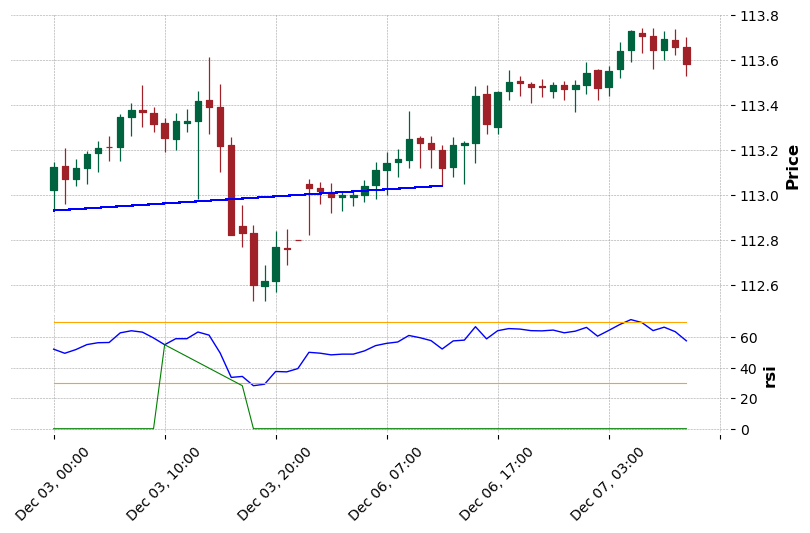

Bullish Divergence


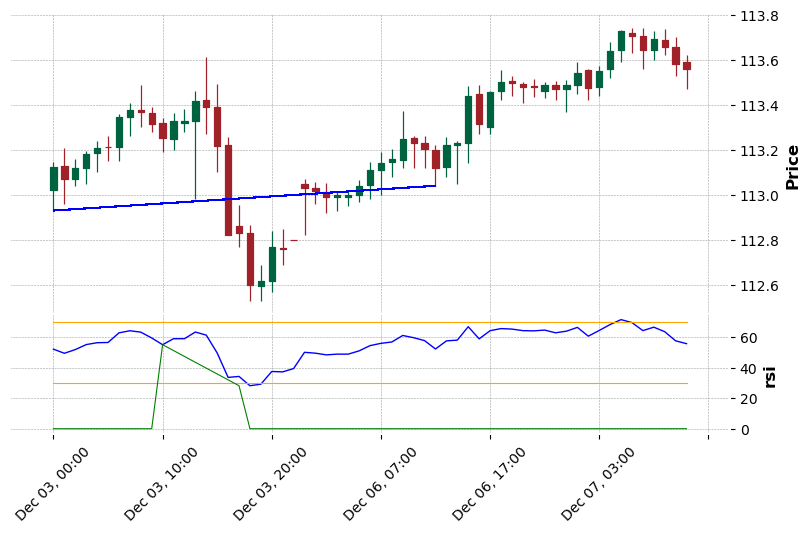

Bullish Divergence


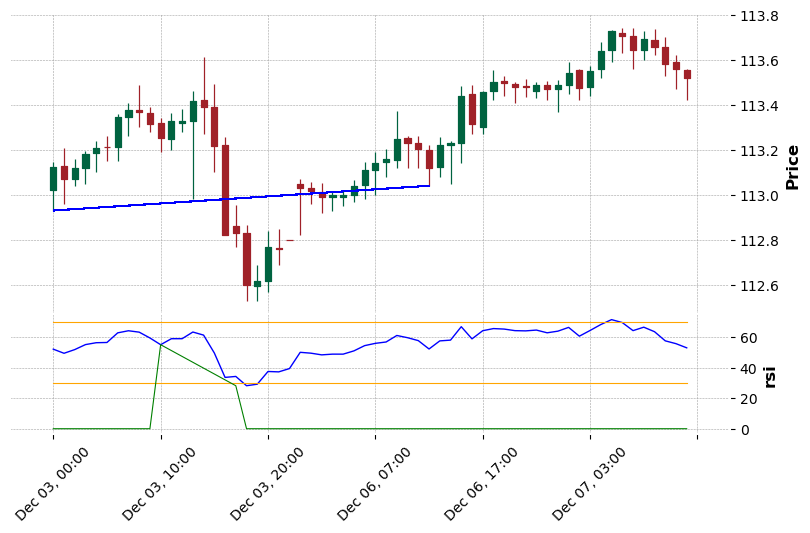

Bullish Divergence


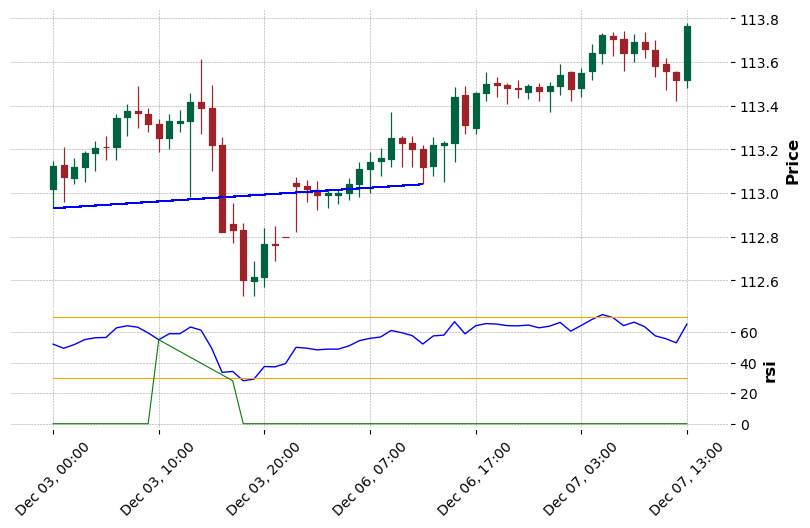

Bullish Divergence


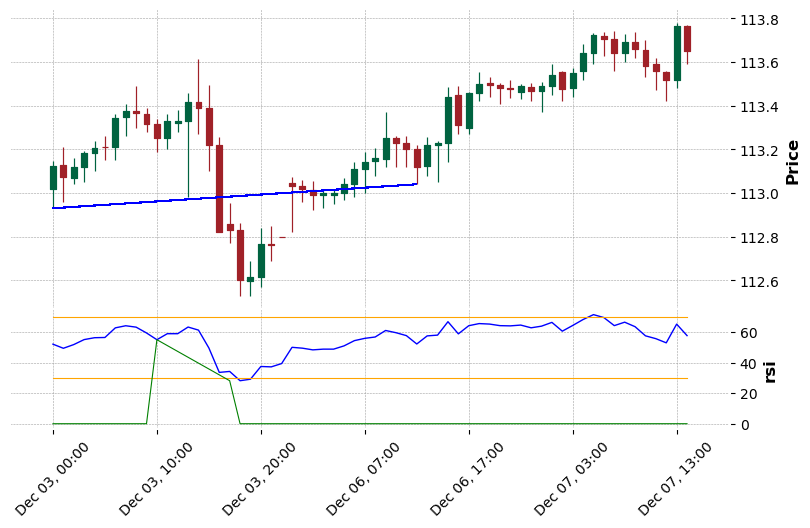

Bullish Divergence


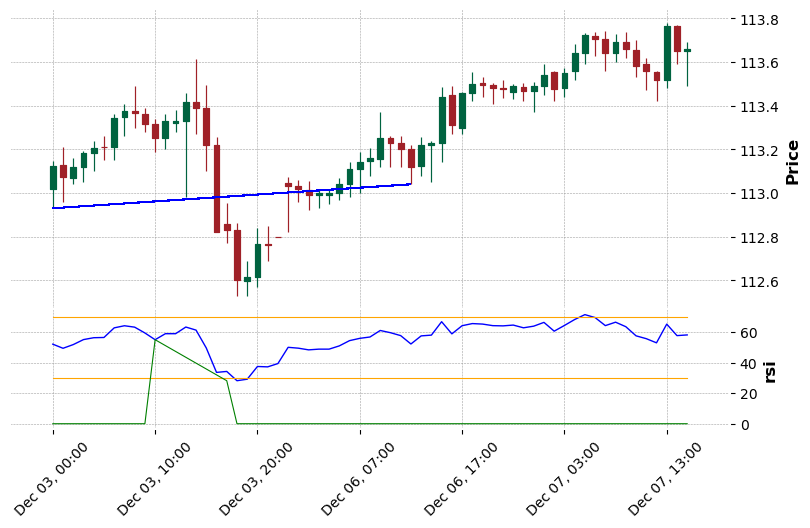

In [13]:
price = df.copy()
for i in range(500, 600):
    
     # current_pat, current_idx, start, end = find_peak(price, i, 10)
     current_high_pat, current_high_idx, high_start, high_end = find_last_peak(price['high'], i, 4, 'high')
     peak_lines = [(price.index[current_high_idx[i]], current_high_pat[i]) for i in range(len(current_high_pat))]

     current_low_pat, current_low_idx, low_start, low_end = find_last_peak(price['low'], i, 4, 'low')
     low_peak_lines = [(price.index[current_low_idx[i]], current_low_pat[i]) for i in range(len(current_low_pat))]

     rsi_high_pat, rsi_high_idx, rsi_high_start, rsi_high_end = find_last_peak_range(price['RSI_14'], high_start, high_end, 4, 'high')
     # rsi_peak_high_line = [(price.index[rsi_high_idx[i]], rsi_high_pat[i]) for i in range(len(rsi_high_pat))]

     rsi_low_pat, rsi_low_idx, rsi_low_start, rsi_low_end = find_last_peak_range(price['RSI_14'], low_start, low_end, 4, 'low')
     # rsi_peak_low_line = [(price.index[rsi_low_idx[i]], rsi_low_pat[i]) for i in range(len(rsi_low_pat))]

     bearish_di = find_divergence(current_high_pat, rsi_high_pat, 'bearish')
     bullish_di = find_divergence(current_low_pat, rsi_low_pat, 'bullish')
     # print(rsi_high_idx, rsi_high_pat)
    
     # if trend == 'up end': # is not False:
          # print(trend)

     # if len(peak_lines) > 1 and len(rsi_high_pat) > 1 and bearish_di is not False:
     #      print(bearish_di)
     #      mpf.plot(df.iloc[high_start:i+15], type='candle', style='charles',
     #           addplot=rsi_plot(df, high_start, i+15, 14, rsi_high_idx, rsi_high_pat),
     #           alines=dict(alines=peak_lines,colors=['blue'], linewidths=0.8),
     #           figsize=(10, 6))

     if len(low_peak_lines) > 1 and len(rsi_low_pat) > 1 and bullish_di is not False:
          print(bullish_di)
          mpf.plot(df.iloc[low_start:i+15], type='candle', style='charles',
               addplot=rsi_plot(df, low_start, i+15, 14, rsi_low_idx, rsi_low_pat),
               alines=dict(alines=low_peak_lines,colors=['blue'], linewidths=0.8),
               figsize=(10, 6))